## Foundations of Data Science: Computational Thinking with Python

Mirroring course Jupyter notebook except using standard modules instead of Berkeley data science module.

## Lecture 8: Histograms

**Area principal** - Areas in data visualization should be proportional to the values they represent (i.e. if using a triangle to represent 20% of the populations, it is misrepresentative to double the edges of that triangle to represent 40% since doubling the edges will create a triangle that can hold 4 of the first. Instead it would be best to use two of the origional triangle)

**pd.cut** - Used for binning data in a pandas Series

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')
pd.set_option('max_rows', 9)

In [2]:
top_movies = pd.read_csv('data/top_movies.csv')
#top_movies

In [3]:
# Looking at distribution of top movies by age
top_movies['Age'] = 2017 - top_movies.Year
print(top_movies['Age'].describe())   # Use summary data to help select bin sizes

# pd.cut to bin data
bins = [0, 5, 10, 15, 25, 40, 65, 100]
pd.cut(top_movies.Age, bins=bins, right=False)
display(pd.cut(top_movies.Age, bins=bins, right=False).value_counts().sort_index())

count    200.000000
mean      30.380000
std       20.493548
min        2.000000
25%       13.750000
50%       27.000000
75%       44.000000
max       96.000000
Name: Age, dtype: float64


[0, 5)       13
[5, 10)      20
[10, 15)     22
[15, 25)     38
[25, 40)     42
[40, 65)     53
[65, 100)    12
Name: Age, dtype: int64

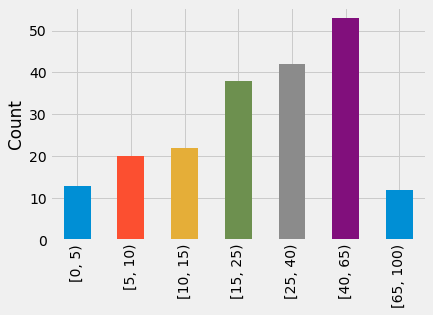

In [4]:
# Bar chart - pd.cut bins counts
#  Doesn't show how bin size changes (except as noted in label)
pd.cut(top_movies.Age, bins=bins, right=False).value_counts().sort_index().plot.bar()
plt.ylabel('Count')
plt.show()
plt.close()

<Figure size 432x288 with 0 Axes>

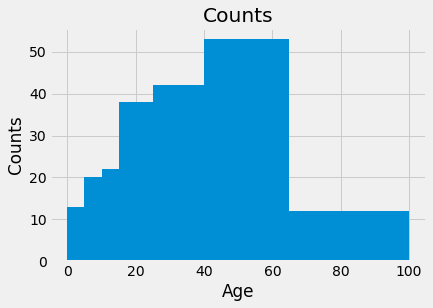

<Figure size 432x288 with 0 Axes>

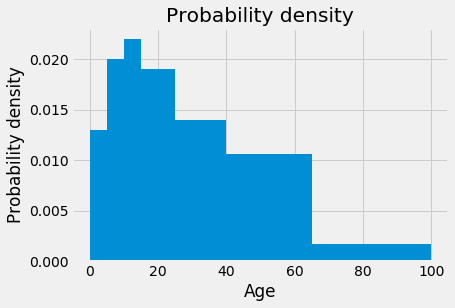

In [8]:
# Pandas histogram - Counts
#  Bin width changes with bin size while y-axis is a count of each bin, resulting 
#  in a plot that violates the area principle as wider binds have greater area
plt.figure()
ax = top_movies.hist('Age', bins=bins)
ax = ax[0][0]  # Not sure why axis is in an array of arrays
ax.set_ylabel('Counts')
ax.set_xlabel('Age')
ax.set_title('Counts')

# Pandas histogram - Normalized
#  Area principle met
bins = [0, 5, 10, 15, 25, 40, 65, 100]
plt.figure()
ax = top_movies.hist('Age', bins=bins, density=True)
ax = ax[0][0]  # Not sure why axis is in an array of arrays
ax.set_ylabel('Probability density')
ax.set_xlabel('Age')
ax.set_title('Probability density')

plt.show()
plt.close()

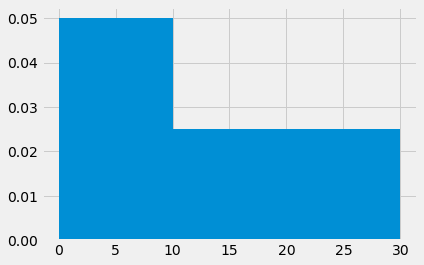

0.05
0.025
1.0
6.960000000000001


In [6]:
plt.figure()

x = top_movies.Age.values

#x = [2, 7, 12, 17, 27, 42, 67]
bins = [0, 10, 30]
x = [1, 11]

plt.hist(x, bins=bins, density=True)
plt.show()

# expected
print(1 / (2 * 10)) # = 0.05
print(1 / (2 * 20)) # = 0.25
print(0.05 * 10 + 0.025 * 20)  # 1.0

print(0.66 * 10 + 0.018 * 20)

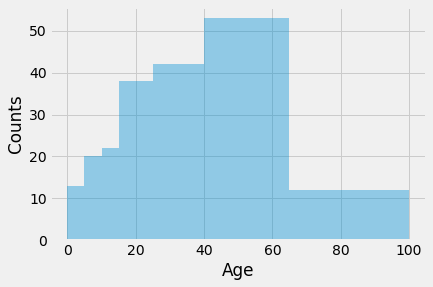

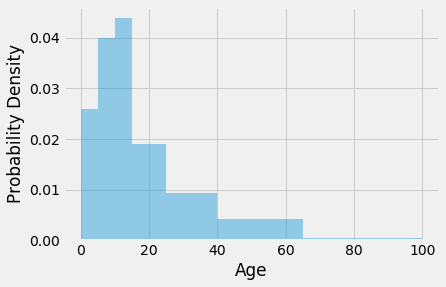

In [6]:
# Seaborn histogram - Counts
plt.figure()
ax = sns.distplot(top_movies.Age, bins=bins, kde=False)
ax.set_ylabel('Counts')

# Seaborn histogram - Normalized
plt.figure()
ax = sns.distplot(top_movies.Age, bins=bins, kde=False, norm_hist=True)
ax.set_ylabel('Probability Density')

plt.show()

(0, 25]      96
(25, 50]     68
(50, 75]     30
(75, 100]     6
Name: Age, dtype: int64

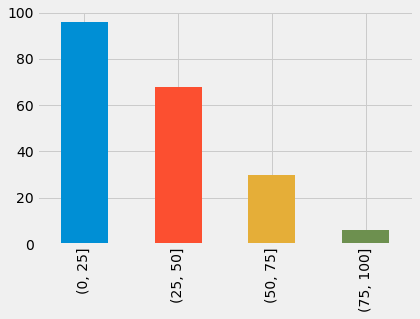

In [7]:
bins = np.arange(0, 101, 25)
pd.cut(top_movies.Age, bins=bins)
display(pd.cut(top_movies.Age, bins=bins).value_counts().sort_index())
pd.cut(top_movies.Age, bins=bins).value_counts().sort_index().plot.bar()
plt.show()

                            Title  Age
133               The Jungle Book   50
153                  The Graduate   50
179  Guess Who's Coming to Dinner   50


(0, 25]     96
(25, 50]    68
Name: Age, dtype: int64

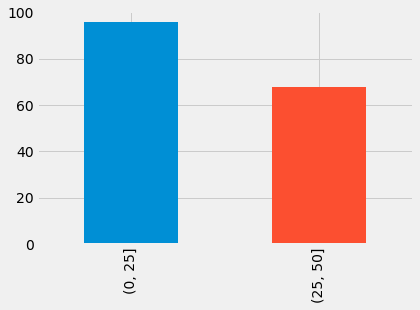

In [8]:
# Not included entire range of data
# Did not see movies on edge of top bin (50 years-old) inluded with this method

print(top_movies[['Title', 'Age']].loc[top_movies.Age == 50])

bins = np.arange(0, 60, 25)
pd.cut(top_movies.Age, bins=bins)
display(pd.cut(top_movies.Age, bins=bins).value_counts().sort_index())
pd.cut(top_movies.Age, bins=bins).value_counts().sort_index().plot.bar()
plt.show()

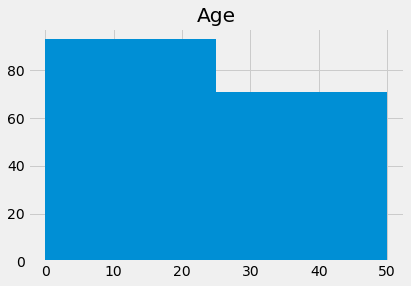

In [9]:
top_movies.hist('Age', bins=bins)
plt.show()

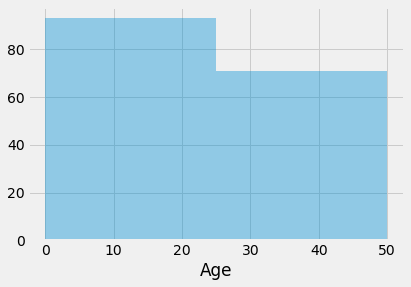

In [10]:
sns.distplot(top_movies.Age, bins=bins, kde=False)
plt.show()